# Regresja wektorów wspierających

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [2]:
dane = pd.read_csv('04_mieszkania.csv')
X = dane.iloc[:, :1].values # kolumna pierwasza 
y = dane.iloc[:, -1].values # ostatnia kolumna
y = y.reshape(-1, 1) # na tablicę dwuwymiarową dla StandardScaler()

In [3]:
# Normalizowanie danych, żeby oscylowały w podobnych wielkościach X i y, średnia 0 i oscylacja 1
# Jest to potrzebne w przypadku kiedy występuje duża różnica w wielkościach danych np. X jest w przedziale 0-100, a y 100000-4000000,
# a najlepiej normalizować zawsze.
X_scaler = StandardScaler() # stworzenie obiektów normalizacji
y_scaler = StandardScaler()
X_norm = X_scaler.fit_transform(X) # normalizacja
y_norm = y_scaler.fit_transform(y)

In [4]:
model = SVR(kernel='rbf')
model.fit(X_norm, y_norm.ravel()) #ravel spłaszcza tablice y do jednego wymiary, wymagania dla fit

SVR()

In [5]:
# Wizualizacja polega na stworzeniu tablicy X-ów na tyle gęstych żeby było widać dokładny przebieg krzywej modelu, (ilość punktów X = (max(X)-min(X)/2))
X_in = np.linspace(np.min(X), np.max(X), int((np.max(X)-np.min(X))/2)) # wygenerowanie X wejściowych w zakresie danych wejściowych między min(X) - max(X)
X_in = X_in.reshape(-1, 1) # konwersja do tablicy dwuwymiarowej
# przygotowanie danych do wyświetlania i powrót z danych znormalizowanych do pierwotnych
X_norm = X_scaler.transform(X_in) # normalizacja nowo stworzonych X
prognoza_norm = model.predict(X_norm) # prognozowanie na danych znormalizowanych
prognoza_norm = prognoza_norm.reshape(-1,1) # konwersja do tablicy dwuwymiarowej 
prognoza = y_scaler.inverse_transform(prognoza_norm) # powrót do danych nieznormalizowanych

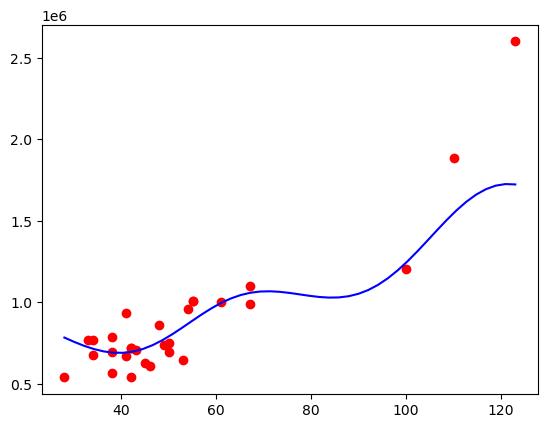

In [6]:
plt.scatter(X, y, color='red')
plt.plot(X_in, prognoza, color='blue') 
plt.show()

In [9]:
# prognozy dla jednej danej wejściowej
X_in = [[95]] # można naraz wyłuskać więcej danych np.[[21],[76],[34]]
X_norm = X_scaler.transform(X_in) # normalizacja nowo stworzonych X
prognoza_norm = model.predict(X_norm) # prognozowanie na danych znormalizowanych
prognoza_norm = prognoza_norm.reshape(-1,1) # konwersja do tablicy dwuwymiarowej 
prognoza = y_scaler.inverse_transform(prognoza_norm) # powrót do danych nieznormalizowanych
print(X_in, prognoza)

[[95]] [[1124698.21996694]]
